In [52]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [53]:
ur1='D:/train.csv'
titanic=pd.read_csv(ur1)
titanic.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

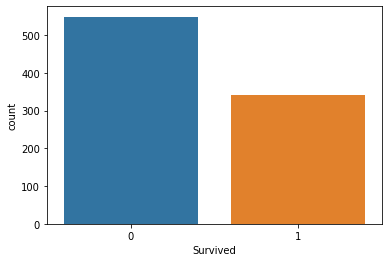

In [54]:
sb.countplot(x='Survived',data=titanic)

In [55]:
plt.show()

In [56]:
titanic.shape

(891, 12)

In [57]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
titanic_data=titanic.drop(['PassengerId','Name','Ticket','Cabin'],1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


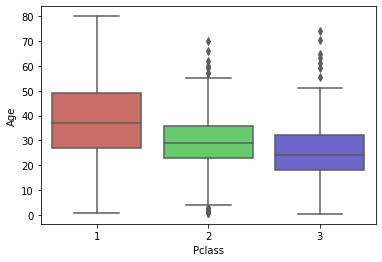

In [60]:
sb.boxplot(x='Pclass',y='Age',data=titanic_data,palette='hls')
titanic_data.head()

In [61]:
plt.show()

In [62]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
            return Age

In [63]:
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(age_approx,axis=1)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [64]:
gender=pd.get_dummies(titanic_data['Sex'])
gender.head()
titanic_data.head()

titanic_data.drop(['Sex','Embarked'],axis=1,inplace=True)
titanic_data.head()

titanic_dmy=pd.concat([titanic_data,gender],axis=1)
titanic_dmy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [65]:
x=titanic_dmy.loc[:,('Pclass','Age','female','male')].values
y=titanic_dmy.loc[:,'Survived'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [66]:
x_test

array([[ 3., 25.,  0.,  1.],
       [ 1., 47.,  0.,  1.],
       [ 3., 24.,  0.,  1.],
       ...,
       [ 2., 39.,  0.,  1.],
       [ 1., 24.,  1.,  0.],
       [ 3., 24.,  1.,  0.]])

In [67]:
LogReg=LogisticRegression()
LogReg.fit(x_train,y_train)
y_pred=LogReg.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)
print(classification_report(y_test,y_pred))

[[140  26]
 [ 30  72]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       166
           1       0.73      0.71      0.72       102

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [68]:
cm=pd.DataFrame(confusion_matrix)

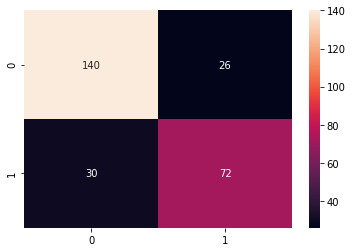

In [69]:
sb.heatmap(cm,annot=True,fmt="d")

In [70]:
plt.show()